### Plotting of Step Intensities

Simple plotting of step intensities after extracting relevant information from a text file. Experimental data from Dipanjana Saha.

In [13]:
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [9]:
def return_intensity_df(filename):
    '''
    Returns a pandas dataframe containing the intensities and positions, for each text file
    '''
    
    # check file encoding errors
    with codecs.open(filename,'r', encoding='utf-8',errors='ignore') as f:
        lines = f.readlines()
    
    # check where position/intensities start in the txt file
    beginning_value = [i for i in lines if i.startswith('Position X ROI#1')]
    
    # find array index having the value beginning_value
    list_start = [i for i, j in enumerate(lines) if j == beginning_value[0]]
    
    # save it all in one string
    csv_list = lines[list_start[0]:]
    csv_string = ''.join(csv_list)
    
    # make a list of lists from one string
    data = list(map(lambda x: x.split(','),csv_string.split("\r\n")))

    # remove the extra '' character at end of list by popping it away
    for item in data[1:]:
        item.pop()
    
    # store in a data frame
    df = pd.DataFrame(data[1:], columns=data[0])
    
    # convert string to float
    df = df.apply(pd.to_numeric)
    
    return df

In [62]:
# get list of files to plot, starting with the name 'step' in the same directory
files = []
for i in os.listdir(os.getcwd()):
    if i.startswith('step'):
        files.append(i)
        
print(files)

['step4.txt', 'step5.txt', 'step6.txt', 'step2.txt', 'step3.txt', 'step1.txt', 'step0.txt']


In [63]:
# create dictionary of dataFrames with filename as key
dfs = {}

for file in files :
    df = return_intensity_df(filename)
    dfs[file] = df

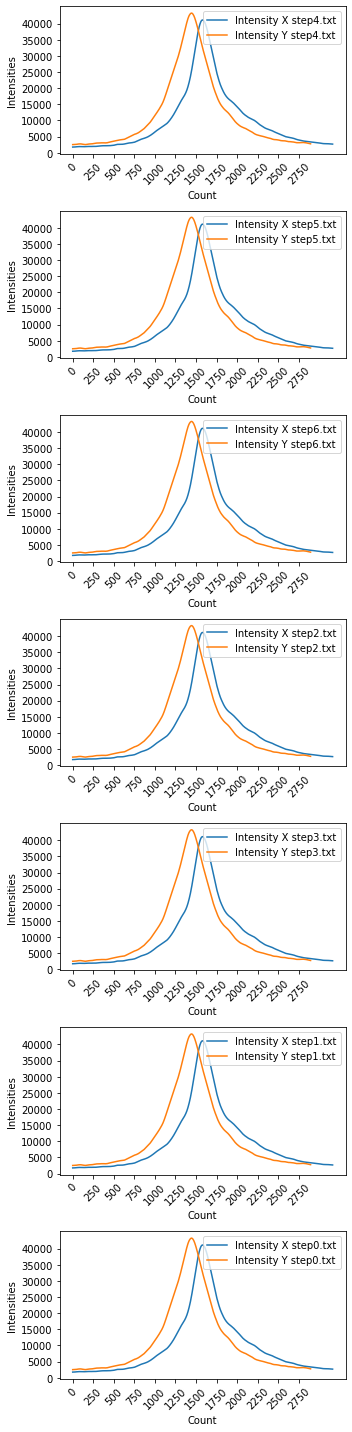

In [71]:
fig, ax = plt.subplots(len(files), figsize=(5,20))

for index, key in enumerate(dfs):
    df = dfs[key]
    intensity_x = df[' Intensity X ROI#1'].dropna()
    intensity_y = df[' Intensity Y ROI#1'].dropna()
    ax[index].plot(intensity_x, label = 'Intensity X '+key)
    ax[index].plot(intensity_y, label = 'Intensity Y '+key)
    ax[index].set_xticks(np.arange(0, len(intensity_y), 250))
    ax[index].set_yticks(np.arange(0, max(intensity_y), 5000))
    ax[index].set_xlabel('Count')
    ax[index].set_ylabel('Intensities')
    plt.setp(ax[index].get_xticklabels(), rotation=45)
    ax[index].legend()

fig.tight_layout()
plt.show()

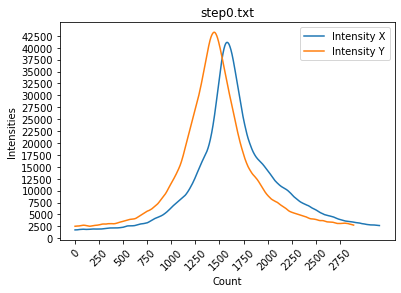

In [55]:
# Just in case one wants to see a single plot

filename = 'step0.txt'

df = dfs[filename]
intensity_x = df[' Intensity X ROI#1'].dropna()
intensity_y = df[' Intensity Y ROI#1'].dropna()

fig = plt.subplots()

plt.title(filename)
plt.plot(intensity_x, label = 'Intensity X')
plt.plot(intensity_y, label = 'Intensity Y')
plt.xticks(np.arange(0, len(intensity_y), 250))
plt.yticks(np.arange(0, max(intensity_y), 2500))
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.ylabel('Intensities')
plt.legend()
# plt.savefig('intensities_plot.jpeg')

plt.show()

### Below is the previous version of the code

The previous version uses each individual text file. The following has been condensed into a function above, and used in an iterative way to display all the plots

In [2]:
file_name = 'step0.txt'
file_path = '/Users/sharbatc/Downloads/'+file_name #replace with own filepath

with codecs.open(file_path,'r', encoding='utf-8',errors='ignore') as f: #ignore errors of encoding utf-8
    lines = f.readlines() #check file encoding errors

In [3]:
beginning_value = [i for i in lines if i.startswith('Position X ROI#1')]
print(beginning_value)

['Position X ROI#1, Intensity X ROI#1,Position Y ROI#1, Intensity Y ROI#1\r\n']


In [4]:
list_start = [i for i, j in enumerate(lines) if j == beginning_value[0]] #array index having the value beginning_value (Position ...)
csv_list = lines[list_start[0]:]
csv_string = ''.join(csv_list)

In [5]:
# show what the string looks like
# csv_string

In [6]:
# make a list of lists, each list being at \r\n and within one list, values being separated by ,
data = list(map(lambda x: x.split(','),csv_string.split("\r\n")))

In [7]:
data[:5]

[['Position X ROI#1',
  ' Intensity X ROI#1',
  'Position Y ROI#1',
  ' Intensity Y ROI#1'],
 ['4630.67383', '1762.438', '4368.92480', '2526.076', ''],
 ['4630.76514', '1762.438', '4369.01611', '2529.076', ''],
 ['4630.85693', '1763.438', '4369.10742', '2532.076', ''],
 ['4630.94824', '1763.438', '4369.19922', '2535.076', '']]

In [8]:
# remove the extra '' character at end of list by popping it away
for item in data[1:]:
    item.pop()

In [9]:
# show what the final list looks like
data[:5]

[['Position X ROI#1',
  ' Intensity X ROI#1',
  'Position Y ROI#1',
  ' Intensity Y ROI#1'],
 ['4630.67383', '1762.438', '4368.92480', '2526.076'],
 ['4630.76514', '1762.438', '4369.01611', '2529.076'],
 ['4630.85693', '1763.438', '4369.10742', '2532.076'],
 ['4630.94824', '1763.438', '4369.19922', '2535.076']]

In [10]:
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,Position X ROI#1,Intensity X ROI#1,Position Y ROI#1,Intensity Y ROI#1
0,4630.67383,1762.438,4368.92480,2526.076
1,4630.76514,1762.438,4369.01611,2529.076
2,4630.85693,1763.438,4369.10742,2532.076
3,4630.94824,1763.438,4369.19922,2535.076
4,4631.04004,1763.438,4369.29053,2538.076


In [11]:
# convert all strings to numerics (float)
df = df.apply(pd.to_numeric)

In [12]:
# preliminary statistics of the data
df.describe()

,Position X ROI#1,Intensity X ROI#1,Position Y ROI#1,Intensity Y ROI#1
count,3162.000000,3162.000000,2894.000000,2894.000000
mean,4775.322328,9761.830789,4501.309294,11407.096041
std,83.552477,9841.680467,76.471982,11356.440777
min,4630.673830,1762.438000,4368.924800,2526.076000
25%,4702.998047,2902.188000,4435.117067,3430.826000
50%,4775.322265,5546.438000,4501.309325,5831.076000
75%,4847.646605,12973.188000,4567.501585,14761.326000
max,4919.970700,41112.438000,4633.693850,43241.076000


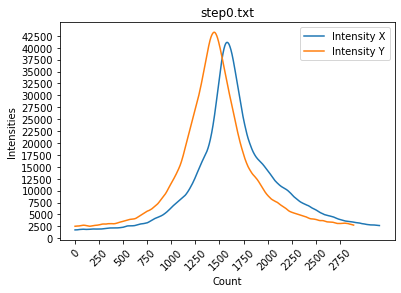

In [18]:
intensity_x = df[' Intensity X ROI#1'].dropna()
intensity_y = df[' Intensity Y ROI#1'].dropna()

fig = plt.subplots()

plt.title(file_name)
plt.plot(intensity_x, label = 'Intensity X')
plt.plot(intensity_y, label = 'Intensity Y')
plt.xticks(np.arange(0, len(intensity_y), 250))
plt.yticks(np.arange(0, max(intensity_y), 2500))
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.ylabel('Intensities')
plt.legend()
# plt.savefig('intensities_plot.jpeg')

plt.show()